In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

### Create data for circular trajectories

In [ ]:
# # Create data for circles
# n_points = 500
# theta = np.linspace(0, 2 * np.pi, n_points)

# data = pd.DataFrame({
#     'X': [10 * np.cos(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
#     'Y': [10 * np.sin(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
#     'XL': [11 * np.cos(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
#     'YL': [11 * np.sin(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
#     'XR': [9 * np.cos(theta) for theta in np.linspace(0, 2 * np.pi, n_points)],
#     'YR': [9 * np.sin(theta) for theta in np.linspace(0, 2 * np.pi, n_points)]
# })

# (Alternative) Create data for other trajectory

In [2]:
# Define the number of data points
num_points = 500

# Create an array of frame numbers from 1 to num_points
frame_numbers = np.arange(1, num_points + 1)

# Create a parametric equation for a circle with sinusoidal oscillation
t = np.linspace(0, 2 * np.pi, num_points)
radius = 10.0 # 1.0
amplitude = 0.1
frequency = 5.0

X = radius * (np.cos(t) + amplitude * np.sin(frequency * t))
Y = radius * (np.sin(t) + amplitude * np.cos(frequency * t))

XL = (radius+1) * (np.cos(t) + amplitude * np.sin(frequency * t))
YL = (radius+1) * (np.sin(t) + amplitude * np.cos(frequency * t))
XR = (radius-1) * (np.cos(t) + amplitude * np.sin(frequency * t))
YR = (radius-1) * (np.sin(t) + amplitude * np.cos(frequency * t))

data = pd.DataFrame({'fr': frame_numbers,'X': X, 'Y': Y, 'XL': XL, 'YL': YL, 'XR': XR, 'YR': YR})

In [3]:
def calculate_unit_tangent_vector(frame_number):
    if frame_number < 0 or frame_number >= num_points:
        return None  # Frame number out of range

    # Calculate the tangent vector at the specified frame number
    dx = X[frame_number + 1] - X[frame_number]
    dy = Y[frame_number + 1] - Y[frame_number]
    magnitude = np.sqrt(dx**2 + dy**2)

    if magnitude == 0:
        return (0, 0)  # Avoid division by zero

    tangent_vector = (dx / magnitude, dy / magnitude)
    return tangent_vector

In [ ]:
# example_frame=0
# tangent_vector = calculate_unit_tangent_vector(example_frame)
# print(tangent_vector)
# print(X[example_frame], Y[example_frame])

In [ ]:
# # Plot the curve
# plt.figure()
# plt.plot(data['X'], data['Y'],color='b')
# plt.plot(data['XL'], data['YL'],color='r')
# plt.plot(data['XR'], data['YR'],color='g')
# if tangent_vector is not None:
#       x_tangent, y_tangent = X[example_frame], Y[example_frame]
#       dx, dy = tangent_vector
#       plt.quiver(x_tangent, y_tangent, dx, dy, color='violet', angles='xy', scale_units='xy', scale=1, width=0.005)

# # plt.plot(rectangle_x,rectangle_y,color='purple')
# # plt.fill(rectangle_x, rectangle_y, color='purple', alpha=0.4)
# plt.grid()
# plt.axis('equal')

### Set an example frame

In [4]:
example_frame=0
tangent_vector = calculate_unit_tangent_vector(example_frame)
print(tangent_vector)
print(X[example_frame], Y[example_frame])

(0.44812484606580094, 0.8939709851770931)
10.0 1.0


In [5]:
XC,YC= X[example_frame], Y[example_frame]
XD,YD= tangent_vector
width=3
height=4

### Define a point where we want to put a vehicle

In [ ]:
# # Define the rectangle parameters
# XC, YC = 7.07, 7.07  # Center of the rectangle
# XD, YD = 1, -1  # Direction of the rectangle
# width = 3
# height = 4

# # XC, YC = 0, 10  # Center of the rectangle
# # XD, YD = 1, 0  # Direction of the rectangle (horizontal)

# # XC, YC = 10, 0  # Center of the rectangle
# # XD, YD = 0, -1  # Direction of the rectangle (horizontal)

### Set a rectangle around the vehicle

In [6]:
# Calculate the corner points of the rectangle using trigonometric functions
theta = np.arctan2(YD, XD)
print("Angle:",math.degrees(theta))
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

rectangle_x = [XC + 0.5 * width * cos_theta - 0.5 * height * sin_theta,
               XC - 0.5 * width * cos_theta - 0.5 * height * sin_theta,
               XC - 0.5 * width * cos_theta + 0.5 * height * sin_theta,
               XC + 0.5 * width * cos_theta + 0.5 * height * sin_theta,
               XC + 0.5 * width * cos_theta - 0.5 * height * sin_theta]

rectangle_y = [YC + 0.5 * width * sin_theta + 0.5 * height * cos_theta,
               YC - 0.5 * width * sin_theta + 0.5 * height * cos_theta,
               YC - 0.5 * width * sin_theta - 0.5 * height * cos_theta,
               YC + 0.5 * width * sin_theta - 0.5 * height * cos_theta,
               YC + 0.5 * width * sin_theta + 0.5 * height * cos_theta]


Angle: 63.376560475540785


(-12.92399906178537,
 13.668897253797567,
 -12.886304660588708,
 12.886819265802737)

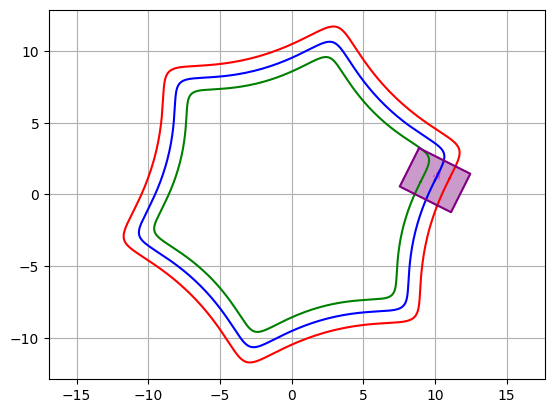

In [7]:
# Plot the curve
plt.figure()
plt.plot(data['X'], data['Y'],color='b')
plt.plot(data['XL'], data['YL'],color='r')
plt.plot(data['XR'],data['YR'],color='g')
if tangent_vector is not None:
      x_tangent, y_tangent = X[example_frame], Y[example_frame]
      dx, dy = tangent_vector
      plt.quiver(x_tangent, y_tangent, dx, dy, color='violet', angles='xy', scale_units='xy', scale=1, width=0.005)

plt.plot(rectangle_x,rectangle_y,color='purple')
plt.fill(rectangle_x, rectangle_y, color='purple', alpha=0.4)

plt.grid()
plt.axis('equal')


### Extract only the data inside the rectangle

Function to check if points of the trajectories are in or out

In [8]:
def isin(X, Y):
    X = X - XC
    Y = Y - YC
    X_ = X*cos_theta + Y*sin_theta
    Y_ = -X*sin_theta + Y*cos_theta
    return (-width/2 <= X_) & (X_ <= width/2) & (-height/2 <= Y_) & (Y_ <= height/2)

In [9]:
# we apply the function to isolate the in points
m1 = isin(data['X'], data['Y'])
m2 = isin(data['XL'], data['YL'])
m3 = isin(data['XR'], data['YR'])

Plot of the "in" points

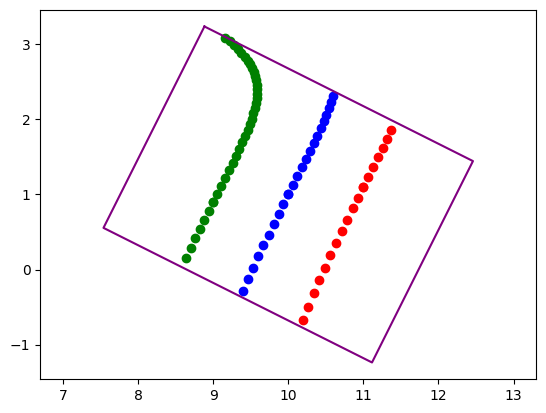

In [10]:
plt.scatter(data.loc[m1, 'X'], data.loc[m1, 'Y'], c='b')
plt.scatter(data.loc[m2, 'XL'], data.loc[m2, 'YL'], c='r')
plt.scatter(data.loc[m3, 'XR'], data.loc[m3, 'YR'], c='g')

plt.plot(rectangle_x, rectangle_y, c='purple')
plt.axis('equal')
plt.show()

### Rotate the plot

In [11]:
# Rotation function
def rotate_coordinates(X, Y, angle, XC, YC):
    # Convert angle to radians
    angle_rad = np.deg2rad(angle)

    # Translate to the origin
    X_translated = X - XC
    Y_translated = Y - YC

    # Perform the rotation
    X_rotated = X_translated * np.cos(angle_rad) - Y_translated * np.sin(angle_rad)
    Y_rotated = X_translated * np.sin(angle_rad) + Y_translated * np.cos(angle_rad)

    # Translate back to the original position
    X_rotated += XC
    Y_rotated += YC

    return X_rotated, Y_rotated

In [12]:
print("Angle:",math.degrees(theta))

Angle: 63.376560475540785


In [13]:
# This angle depends on the previously calculate 
# angle_degrees=135
angle_degrees= 90 - math.degrees(theta)
print("Angle :",angle_degrees)
rotate_with_parameters= lambda X,Y: rotate_coordinates(X,Y,angle_degrees,XC,YC)
rec = list(map(rotate_with_parameters,rectangle_x,rectangle_y))
print(rec)
# RX = [item[0] for item in rec]
# RY = [item[1] for item in rec]
# print(RX,RY)

RX,RY= zip(*rec)
print(RX,RY)

Angle : 26.623439524459215
[(8.0, 2.5000000000000004), (7.999999999999999, -0.5000000000000002), (12.0, -0.5000000000000002), (12.0, 2.5000000000000004), (8.0, 2.5000000000000004)]
(8.0, 7.999999999999999, 12.0, 12.0, 8.0) (2.5000000000000004, -0.5000000000000002, -0.5000000000000002, 2.5000000000000004, 2.5000000000000004)


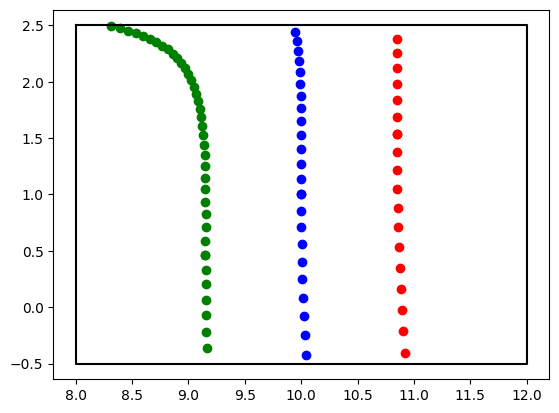

In [14]:
plt.plot(RX,RY,c='k')
XRotated,YRotated=rotate_coordinates(data.loc[m1, 'X'], data.loc[m1, 'Y'], angle_degrees, XC, YC)
plt.scatter(XRotated,YRotated,c='b')
XLRotated,YLRotated=rotate_coordinates(data.loc[m2, 'XL'], data.loc[m2, 'YL'], angle_degrees, XC, YC)
plt.scatter(XLRotated,YLRotated,c='r')
XRRotated,YRRotated=rotate_coordinates(data.loc[m3, 'XR'], data.loc[m3, 'YR'], angle_degrees, XC, YC)
plt.scatter(XRRotated,YRRotated,c='g')
plt.axis('equal')
plt.show()